In [2]:

import os
import tarfile
# from six.moves import urllib
import urllib.request  # No need for six.moves        # link:- https://chatgpt.com/c/671be293-be20-8005-8d6e-9925ada3c99a


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)  # Create directory if it doesn't exist
        print("Directory created:", housing_path)

    tgz_path = os.path.join(housing_path, "housing.tgz")
    print("Downloading dataset...")
    
    urllib.request.urlretrieve(housing_url,tgz_path)  # Download .tgz file
    print("Download complete. Extracting...")

    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)  # Extract files
        print("Extraction complete.")

fetch_housing_data()




Download complete. Extracting...
Extraction complete.


C:\Users\prash\AppData\Local\Temp\ipykernel_18624\3978864188.py:23: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)  # Extract files


In [3]:

import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

housing=load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


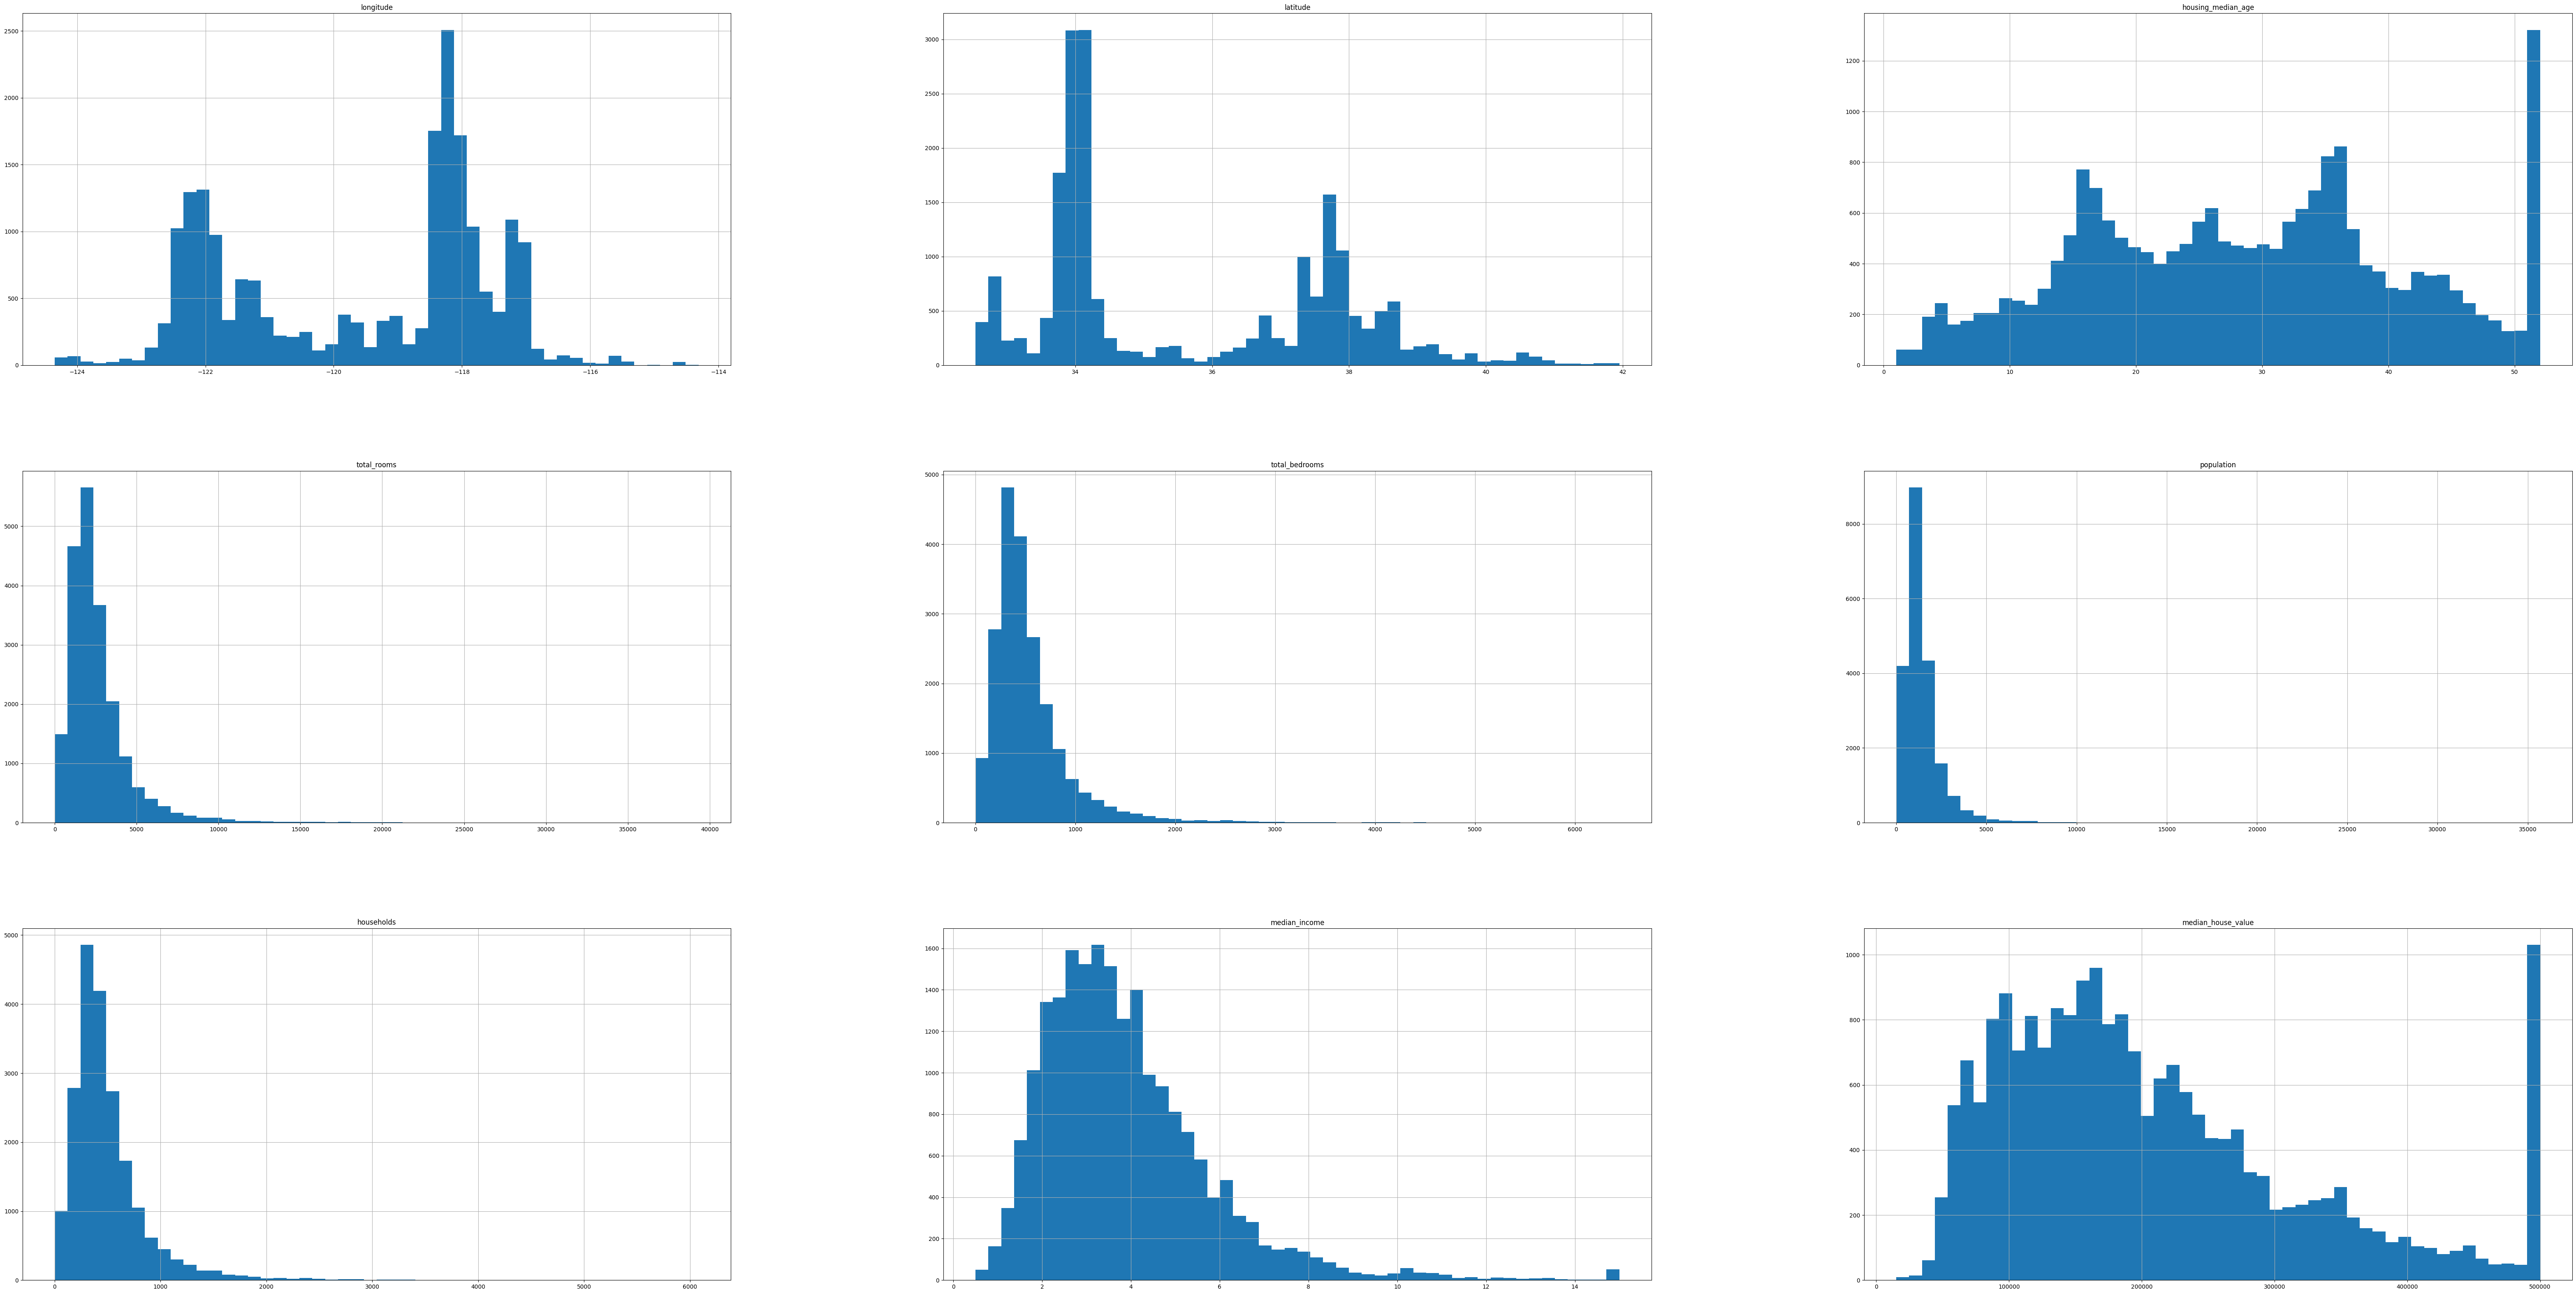

In [7]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(80,40))
plt.show()


**normal distribution plot of an feature**

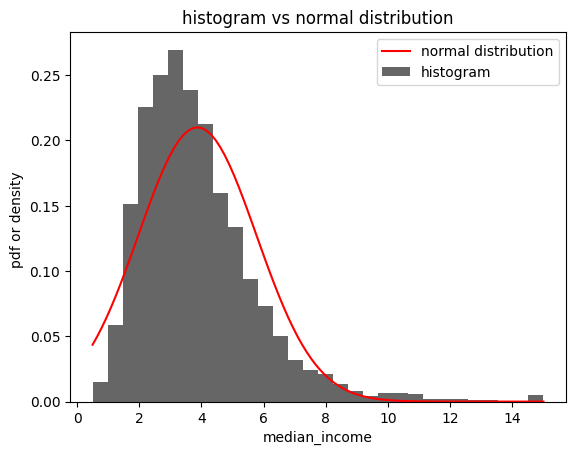

In [8]:

import numpy as np
from scipy.stats import norm
feature_data=housing["median_income"].dropna()
mean=feature_data.mean()
std=feature_data.std()
x=np.linspace(feature_data.max(),feature_data.min(),100)
y=norm.pdf(x,mean,std)

#plt.figure(figsize=(10,6))
plt.plot(x,y,label='normal distribution',color='red')
plt.hist(feature_data,bins=30,density=True,color='black',alpha=0.6,label='histogram')

plt.title("histogram vs normal distribution")
plt.xlabel("median_income")
plt.ylabel("pdf or density ")
plt.legend()
plt.show()

In [9]:

def split_train_test(data,test_ratio):
    np.random.seed(42)
    shuffled_index=np.random.permutation(len(data))  # it is numpay array
    test_fix_size =int(len(data)*test_ratio)
    test_indices=shuffled_index[:test_fix_size]
    train_indices=shuffled_index[test_fix_size:]
    return data.iloc[test_indices],data.iloc[train_indices]

test_set,train_set=split_train_test(housing,0.2)






In [10]:
from zlib import crc32
def test_set_check(identity,test_ratio):
    return crc32(np.int64(identity)) & 0xffffffff< test_ratio*2**32


def split_train_test_by_id(data,test_ratio,id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda id_ : test_set_check(id_,test_ratio))
    return data.loc[~in_test_set] , data.loc[in_test_set]


#housing_with_id) that is effectively a copy of housing, but with a reset index column added to it. 

housing_with_id = housing.reset_index() #housing.reset_index(inplace=True)
                                            # this will change if we will put inplace = True
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"index")

# train_set

In [11]:
housing_with_id=housing.copy()
housing_with_id["id"] = -housing["longitude"]*1000 + housing["latitude"]
train_set,test_set = split_train_test_by_id(housing_with_id,0.2,"id")
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,122257.86
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,122277.85
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,122297.84
10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,122297.85
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,122297.85
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,121129.48
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,121249.49
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,121259.43
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,121359.43


<Axes: >

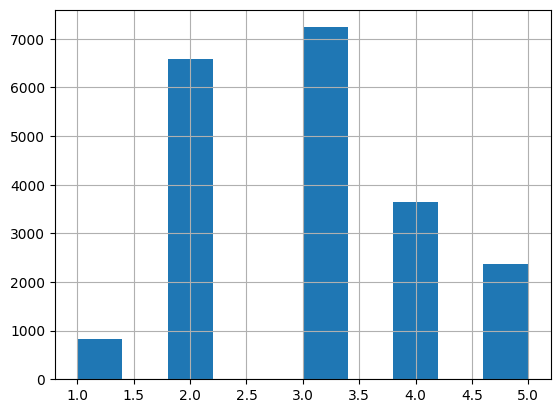

In [12]:
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [13]:
from sklearn.model_selection import train_test_split
random_train_set,random_test_set=train_test_split(housing,test_size=0.2,random_state=42)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_index,test_index in split.split(housing,housing["income_cat"]):   # The second argument: housing["income_cat"] – This is the feature based on which the data will be stratified. .
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3


In [15]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [16]:


housing["income_cat"].value_counts()/len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [17]:
def category_proportions(data):
    return data["income_cat"].value_counts(normalize=True).sort_index()

overall_props=category_proportions(housing)
random_props=category_proportions(random_test_set)
stratified_props=category_proportions(strat_test_set)

rand_percentage_error =((overall_props-random_props)/overall_props)*100
strat_percentage_error =((overall_props-stratified_props)/overall_props)*100

results= pd.DataFrame({'overall_props':overall_props,
                       'random_props':random_props,
                       'stratified_props':stratified_props,
                       'rand_percentage_error':rand_percentage_error,
                       'strat_percentage_error':strat_percentage_error
                       })

results

,overall_props,random_props,stratified_props,rand_percentage_error,strat_percentage_error
income_cat,,,,,
1,0.039826,0.040213,0.039971,-0.973236,-0.364964
2,0.318847,0.324370,0.318798,-1.732260,0.015195
3,0.350581,0.358527,0.350533,-2.266446,0.013820
4,0.176308,0.167393,0.176357,5.056334,-0.027480
5,0.114438,0.109496,0.114341,4.318374,0.084674


In [18]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [19]:
# for set in (strat_train_set,strat_test_set):
#     set.drop("income_cat",axis=1,inplace=True)

strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3


**Let’s create a copy so you can play with it without harming the training set:**

In [20]:
housing_train=strat_train_set.copy()
housing_train


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,2
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,5
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,2
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,2
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,4
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,2
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,3
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,3


**Visualizing Geographical Data**

<Axes: xlabel='longitude', ylabel='latitude'>

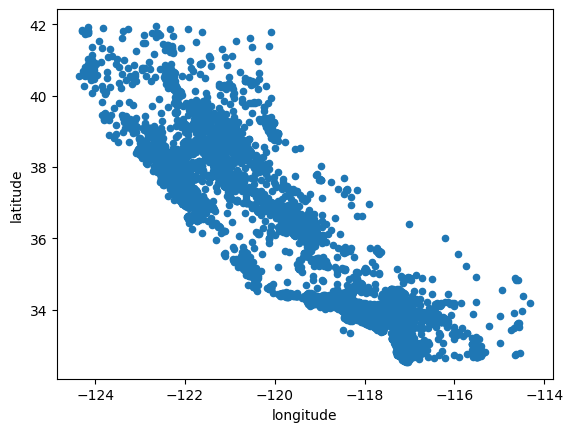

In [21]:
housing_train.plot(kind='scatter',x="longitude",y="latitude")


**A better visualization highlighting high-density areas**

This scatter plot, which plots the latitude and longitude of California districts, visually represents the geographical layout of these districts across California.

What This Plot Represents:
Geographic Distribution: Each point represents a district in California, located at its approximate latitude and longitude coordinates. The plot provides a spatial view of where the districts are located within the state.

Population or Data Density: The opacity of the points (controlled by alpha=0.1) allows for overlapping points to appear darker, indicating areas with a higher density of districts. This can give insights into urban and rural distributions:

Darker Regions: These denote areas with a concentration of districts, likely corresponding to urban centers like Los Angeles, San Francisco Bay Area, and San Diego. These cities have more housing data points, reflecting higher population density and housing availability.


Lighter Regions: The lighter, less dense areas represent rural or less populated regions in California, such as the central valley or mountainous areas, which have fewer districts and thus fewer data points.

<Axes: xlabel='longitude', ylabel='latitude'>

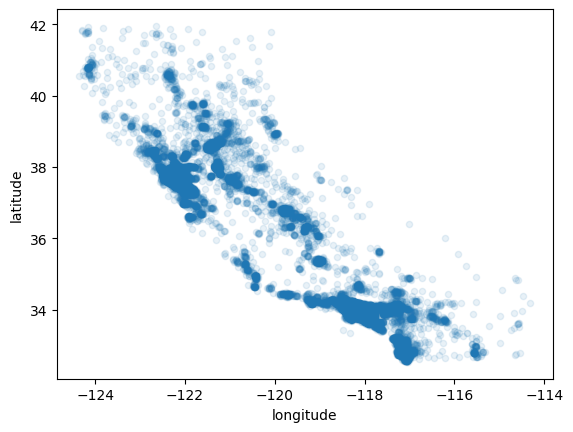

In [22]:
housing_train.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

Explanation of Each Parameter

kind="scatter": Specifies that the plot type is a scatter plot.

**x="longitude" and y="latitude": These specify the data columns used for the x-axis and y-axis. Here, "longitude" and "latitude" represent the geographic coordinates of each district in California.**

**alpha=0.4: Sets the transparency level of the points. An alpha value of 0.4 means the points are partially transparent, allowing for overlapping points to become darker. This helps indicate areas of higher density (where points overlap more heavily).**

**s=housing["population"]/100: This sets the size of each point based on the population of each district. Dividing by 100 scales down the population values so that they fit well on the plot. Larger districts (higher population) will have larger circles, visually emphasizing areas with higher population density.**

**label="population": Sets the legend label for the size of the points. This label is displayed when plt.legend() is called.**

**figsize=(10,7): Sets the size of the figure to 10 inches wide and 7 inches high. This helps make the plot large enough to visualize the data points clearly.**

**c="median_house_value": Specifies that the color of each point should correspond to the median house value in that district. Higher house values will be shown in different colors, according to the colormap.**

**cmap=plt.get_cmap("jet"): This sets the colormap to "jet". The "jet" colormap ranges from blue (for lower values) to red (for higher values). This makes it easy to distinguish between districts with lower and higher median house values based on color.**

**colorbar=True: Adds a color bar to the side of the plot, which serves as a legend for the color scale. It helps interpret the colors in terms of the median house values.**

**California housing prices**

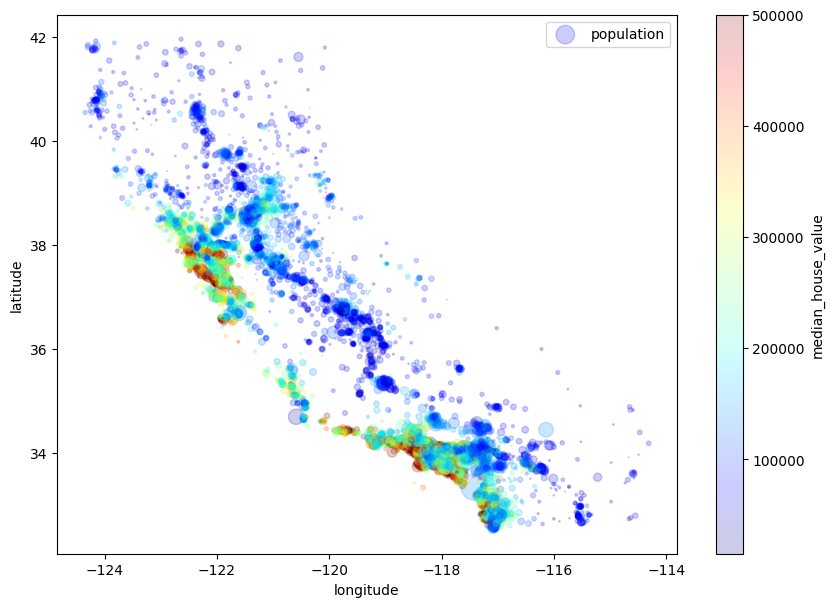

In [23]:
housing_train.plot(kind='scatter',x='longitude',y='latitude',alpha=0.2,s=housing_train['population']/100,label="population",c='median_house_value',figsize=(10,7),cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

**Compute the standard correlation coecient (also called Pearson’s r) between every pair of attributes using the corr() method:**

In [24]:
corr_matrix=housing_train.select_dtypes(include=np.number).corr()  # np.number is a data type provided by NumPy that represents all numeric types, including integers and floating-point numbers
corr_matrix["median_house_value"].sort_values(ascending=False)     

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [25]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


**focus on a few promising
attributes that seem most correlated with the median housing value**

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

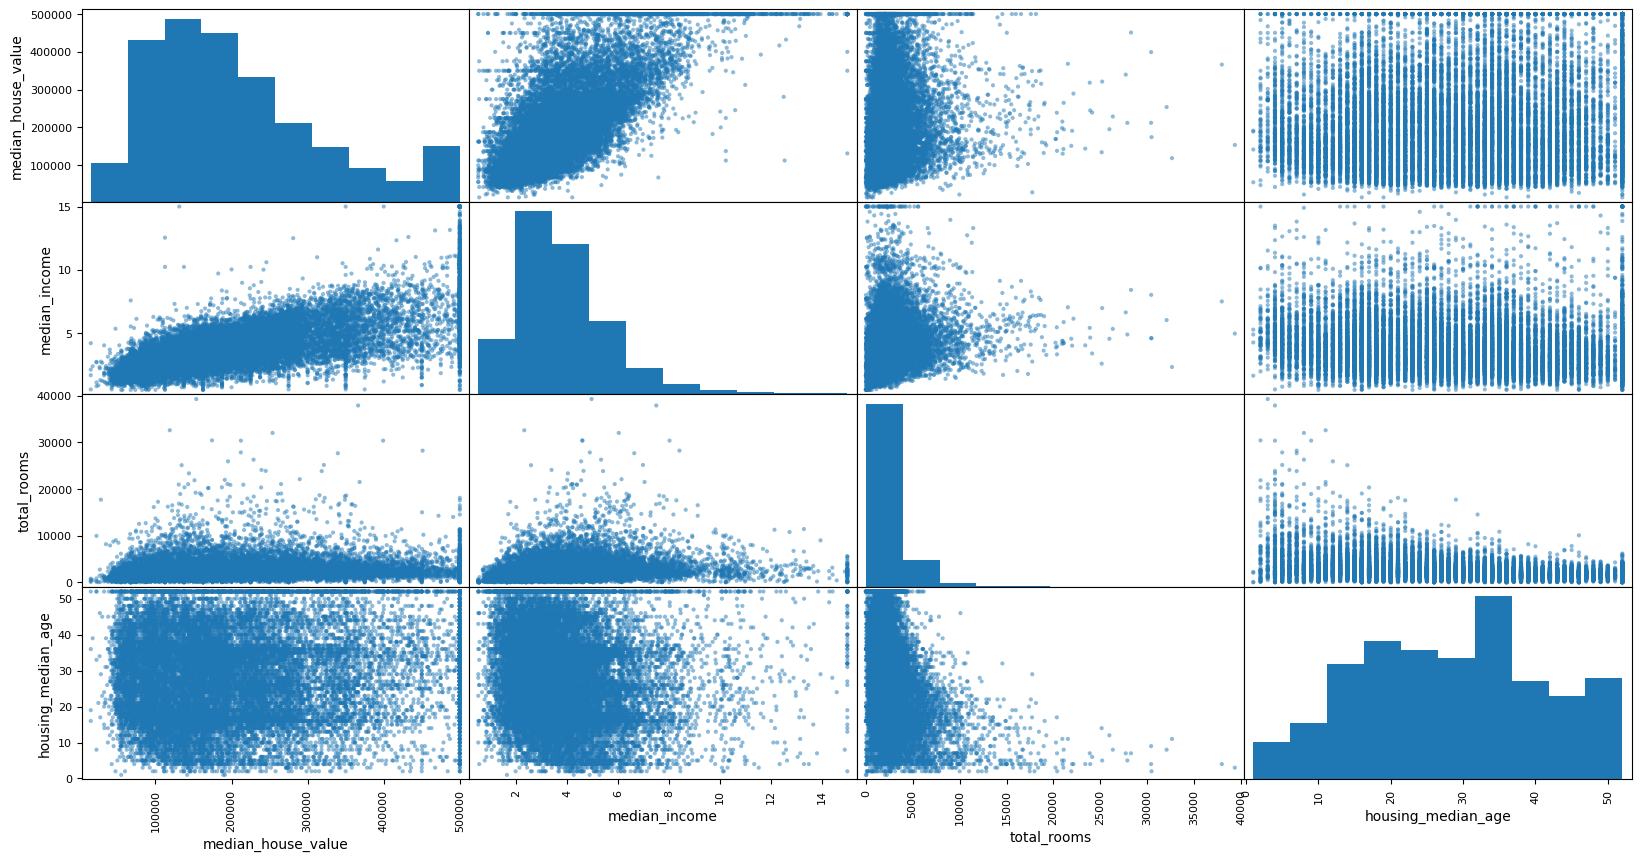

In [26]:
from pandas.plotting import scatter_matrix
features=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[features],figsize=(20,10))

**Median income versus median house value**

<Axes: xlabel='median_income', ylabel='median_house_value'>

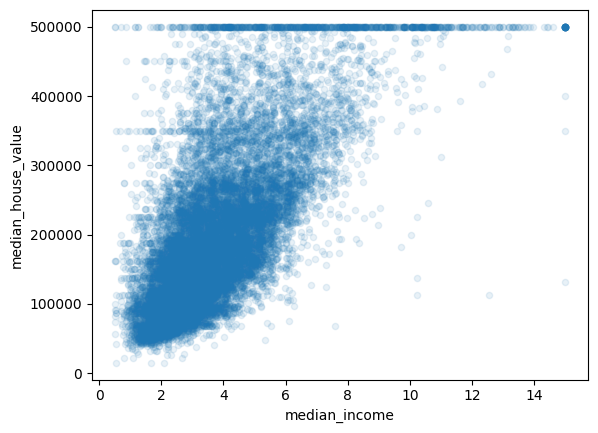

In [27]:
housing_train.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [28]:
housing_train['rooms_per_household']=housing_train["total_rooms"]/housing_train["households"]
housing_train["bedroom_per_room"]=housing_train["total_bedrooms"]/housing_train["total_rooms"]
housing_train["no_of_people_per_room"]=housing_train["population"]/housing_train["total_rooms"]

corr_matrix=housing_train.select_dtypes(include=np.number).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value       1.000000
median_income            0.687151
rooms_per_household      0.146255
total_rooms              0.135140
housing_median_age       0.114146
households               0.064590
total_bedrooms           0.047781
population              -0.026882
no_of_people_per_room   -0.031082
longitude               -0.047466
latitude                -0.142673
bedroom_per_room        -0.259952
Name: median_house_value, dtype: float64

<Axes: xlabel='bedroom_per_room', ylabel='median_house_value'>

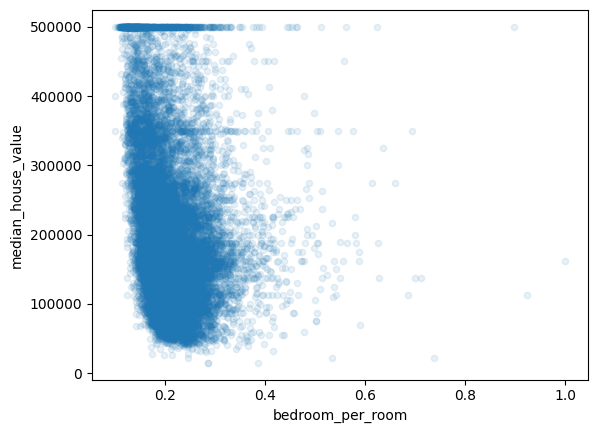

In [29]:
housing_train.plot(kind='scatter',x="bedroom_per_room",y="median_house_value",alpha=0.1)

In [30]:
features=strat_train_set.drop("median_house_value",axis=1)   #drop() creates a copy of the data and does not affect strat_train_set
label=strat_train_set["median_house_value"].copy()
features.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'income_cat'],
      dtype='object')

**Data Cleaning**

three options:

• Get rid of the corresponding districts.

• Get rid of the whole attribute.

• Set the values to some value (zero, the mean, the median, etc.).


You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna()

In [31]:
#features.dropna(subset=['total_bedrooms'])  # option 1 

#By default, it operates on rows (axis=0), so it will drop any rows that contain NaN values in the specified column(s).


#features.drop("total_bedrooms",axis=1)     # option 2



# median=features["total_bedrooms"].median()
# features["total_bedrooms"].fillna(median,inplace=True)




**Scikit-Learn provides a handy class to take care of missing values: SimpleImputer.**

In [32]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

features_num=features.drop('ocean_proximity', axis=1)
imputer.fit(features_num)
imputer.statistics_


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [33]:
features_num.select_dtypes(include=np.number).median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

**Now you can use this “trained” imputer to transform the training set by replacing missing values by the learned medians:**

In [34]:
x=imputer.transform(features_num)
type(x)        # numpy.ndarray


# transform it agian into dataframe:


housing_tr=pd.DataFrame(x,columns=features_num.columns)

housing_tr.describe().head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884,3.006783
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931,1.054600
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,1.000000
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950,2.000000


In [35]:
features_cat=features[["ocean_proximity"]]
features_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


Most Machine Learning algorithms prefer to work with numbers so let’s con‐
vert these categories from text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder class:

. OrdinalEncoder is a transformer in Scikit-Learn used to convert categorical data into numerical values. It assigns a unique integer to each category in a column.
ordinal_encoder = OrdinalEncoder()
This line creates an instance of OrdinalEncoder named ordinal_encoder.
No specific arguments are passed here, so it uses the default configuration.

fit_transform(features_cat) does two things:
fit: Analyzes the unique categories in features_cat and assigns each one a unique integer code.

transform: Converts each category in features_cat to its corresponding integer code based on the mapping created in fit.

features_cat_encoded now contains the transformed data as a NumPy array with the categorical values encoded as integers.







In [36]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()

features_cat_encoded=ordinal_encoder.fit_transform(features_cat)
type(features_cat_encoded)    # numpy.ndarray

features_cat_encoded[:5]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.]])

In [37]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Scikit-Learn provides a OneHotEn
coder class to convert categorical values into one-hot vectors:

Solution: One-Hot Encoding
One-Hot Encoding
To avoid this confusion, we use One-Hot Encoding. Here’s how it works:

We create a new column for each unique category.
In each row, only one of these columns will have a 1 (indicating the presence of that category), while the others will be 0.

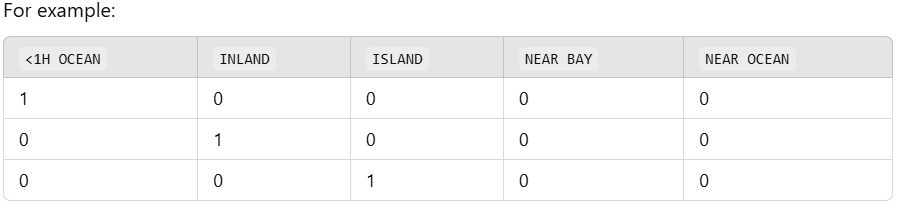



Now, there’s no risk of the algorithm thinking any category is “closer” or “more similar” to another based on numbers. 
It treats each category independently, which is what we want for data like this.








In [38]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
features_cat_1hot=cat_encoder.fit_transform(features_cat)
type(features_cat_1hot)           # scipy.sparse._csr.csr_matrix
print(features_cat_1hot)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>
  Coords	Values
  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 3)	1.0
  (19, 0)	1.0
  (20, 1)	1.0
  (21, 3)	1.0
  (22, 1)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 4)	1.0
  (16490, 4)	1.0
  (16491, 1)	1.0
  (16492, 1)	1.0
  (16493, 0)	1.0
  (16494, 0)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 0)	1.0
  (16498, 4)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 1)	1.0
  (16502, 1)	1.0
  (16503, 1)	1.0
  (16504, 1)	1.0
  (16505, 0)	1.0
  (16506, 0)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 0)	1.0
  (16510, 0)	1.0
  (16511, 1)	1.0


You can use it mostly like a normal 2D array, but if you really want to
convert it to a (dense) NumPy array, just call the toarray() method:

**differnce b/w sparse matrix and numpy array**


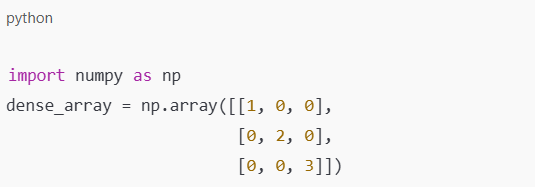
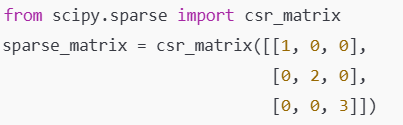

In [39]:
features_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Once again, you can get the list of categories using the encoder’s categories_
instance variable:

In [40]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [41]:
features.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'income_cat'],
      dtype='object')

1. Transformers
Purpose: A transformer is used to modify or preprocess data, often through imputation, scaling, encoding, or feature engineering.
Key Methods:
Must implement fit() and transform() methods (or fit_transform()).
transform() takes input data, applies transformations, and returns the transformed data.
Examples of transformers:

SimpleImputer (for handling missing values).
StandardScaler (for scaling features to a standard range).
Custom transformers like CombinedAttributesAdder (used to add new features or modify existing ones).



2. Estimators
Purpose: An estimator is generally used for training a model and making predictions, such as regression or classification.
Key Methods:
Must implement fit() to train the model on the provided data.
May also implement predict() (for prediction), score() (for scoring the model), and other model-specific methods.
Examples of estimators:

LinearRegression (for linear regression).
RandomForestClassifier (for classification with random forests).




**All steps except the last must be transformers with fit_transform() to allow sequential data transformation.**

**The last step is typically an estimator that can fit and make predictions, as it doesn’t need to transform data for further steps.**

Estimators in Scikit-Learn
In Scikit-Learn, the term estimator refers to any object that can learn from data. It’s a broad category, covering anything that implements a fit() method.
This includes transformers (e.g., SimpleImputer, StandardScaler) and models that make predictions (e.g., RandomForestRegressor, LinearRegression).
So, when I mentioned "estimator object," I was referring to the fact that Scikit-Learn considers any object that can be fitted to data as an estimator.

**Custom Transformers**

In [42]:
from sklearn.base import BaseEstimator,TransformerMixin 
no_of_rooms_idx,bedrooms_index,population_index,household_index=3,4,5,6
class combinationofattribute(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedroom_per_room=True):
        self.add_bedroom_per_room=add_bedroom_per_room
    
    def fit(self,x,y=None):
        return self
    
    def transform(self,x,y=None):
        room_per_household=x[:,no_of_rooms_idx]/x[:,household_index]
        population_per_household=x[:,population_index]/x[:,household_index]
        
        if self.add_bedroom_per_room:
            bedroom_per_room=x[:,bedrooms_index]/x[:,no_of_rooms_idx]
            return np.c_[x,room_per_household,population_per_household,bedroom_per_room]
        else:
            return np.c_[x,room_per_household,population_per_household]



attribute_mix=combinationofattribute(add_bedroom_per_room=False)
features_extra_attributes=pd.DataFrame(attribute_mix.transform(features.values))
features_extra_attributes.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,2,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2,3.886128,1.859213
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3,6.096552,3.167241


In [43]:
features_extra_attributes.columns

RangeIndex(start=0, stop=12, step=1)

**Feature Scaling**


There are two common ways to get all attributes to have the same scale: min-max
scaling and standardization.

1)Min-max scaling (many people call this normalization) is quite simple: values are
shifted and rescaled so that they end up ranging from 0 to 1.

Scikit-Learn provides a transformer called MinMaxScaler

2)Standardization is quite different: first it subtracts the mean value (so standardized
values always have a zero mean), and then it divides by the standard deviation so that
the resulting distribution has unit variance.

Scikit-Learn provides a transformer called StandardScaler for stand‐
ardization.

Unlike min-max scaling, standardization
does not bound values to a specific range, which may be a problem for some algo‐
rithms (e.g., neural networks often expect an input value ranging from 0 to 1). How‐
ever, standardization is much less affected by outliers. For example, suppose a district
had a median income equal to 100 (by mistake). Min-max scaling would then crush
all the other values from 0–15 down to 0–0.15, whereas standardization would not be
much affected.

**Note that scaling the target values is generally not required.**

**pipeline on numerical features**

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
my_pipeline=Pipeline([
                     ('imputer',SimpleImputer(strategy="median")),
                     ('add_attri',combinationofattribute()),
                     ('std_scaling',StandardScaler())
                     ])
transformed_numerical_features = my_pipeline.fit_transform(features_num)
pd.DataFrame(transformed_numerical_features).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.954687,0.017395,0.006223,-0.121122
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,1.890078,0.569256,-0.040811,-0.810867
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.954687,-0.018024,-0.075371,-0.338273
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.954687,-0.595140,-0.106803,0.961205
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,-0.006432,0.251241,0.006109,-0.474513


**categorical columns and the numerical columns both handle at a time using Scikit-Learn introduced the ColumnTransformer**:

**The constructor requires a list of tuples, where each
tuple contains a name, a transformer and a list of names (or indices) of columns
that the transformer should be applied to.**

In [45]:
from sklearn.compose import ColumnTransformer
num_attribs=list(features_num)            # list of numerical column names:
cat_attribs=["ocean_proximity"]           # list of categorical column names,
full_pipeline=ColumnTransformer([
                                  ("num",my_pipeline,num_attribs),
                                  ("cat",OneHotEncoder(),cat_attribs)
                                ])

transformed_full_features=full_pipeline.fit_transform(features)
pd.DataFrame(transformed_full_features).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,-0.954687,0.017395,0.006223,-0.121122,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,1.890078,0.569256,-0.040811,-0.810867,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,-0.954687,-0.018024,-0.075371,-0.338273,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,-0.954687,-0.595140,-0.106803,0.961205,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,-0.006432,0.251241,0.006109,-0.474513,1.0,0.0,0.0,0.0,0.0


In [46]:

num_attribs


['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_cat']

#### note:

**Note that the OneHotEncoder returns a sparse matrix, while the num_pipeline returns
a dense matrix. When there is such a mix of sparse and dense matrices, the Colum
nTransformer estimates the density of the final matrix (i.e., the ratio of non-zero
cells), and it returns a sparse matrix if the density is lower than a given threshold (by
default, sparse_threshold=0.3). In this example, it returns a dense matrix. And
that’s it! We have a preprocessing pipeline that takes the full housing data and applies
the appropriate transformations to each column.**

** In Scikit-Learn’s ColumnTransformer, you can configure each column (or set of columns) to undergo a specific transformation. Additionally, you have flexibility in how you handle columns that aren’t specified in the ColumnTransformer list. Let’s break down these options in detail:**

##### "drop": If you specify "drop" for a column in the ColumnTransformer, that column will be removed from the output. This can be useful if certain columns are irrelevant to the model or should not be part of the transformed dataset.

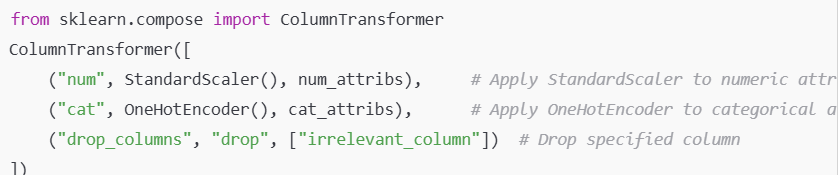



##### "passthrough": If you specify "passthrough" for a column, the ColumnTransformer will leave it as-is in the output. This is useful if you want certain columns included in the output without applying any transformation

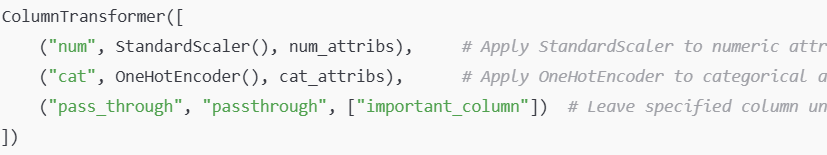


##### The remainder parameter in ColumnTransformer specifies what should happen to any columns not listed explicitly in the transformer. You can set remainder to:      "drop": The default behavior, which drops any columns that were not explicitly specified. This ensures that only the columns you’ve explicitly transformed or passed through are in the output.

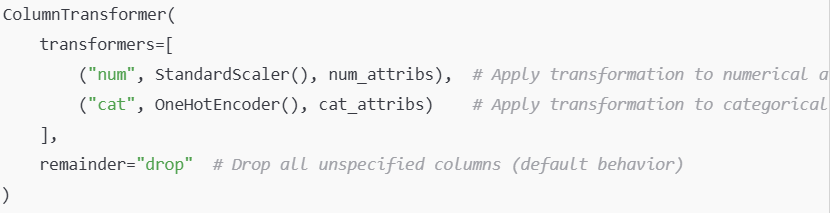


##### "passthrough": Leaves unspecified columns untouched in the output. This is useful if you want some columns to remain as they are.


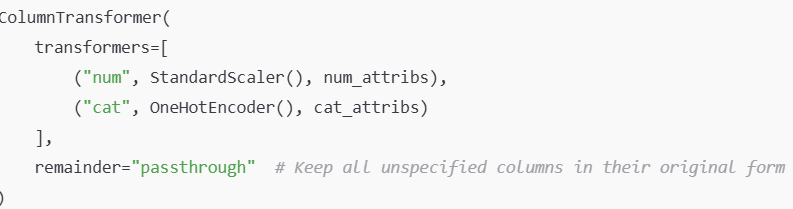


##### Another Transformer: You can apply a specific transformer to all remaining columns. For example, you might want to standardize all columns that weren’t explicitly mentioned.

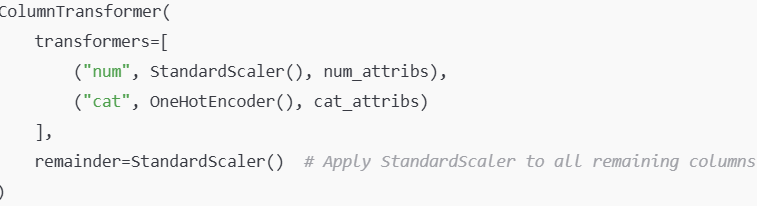





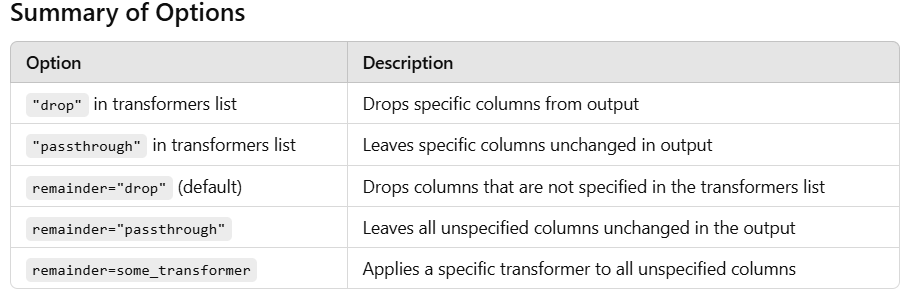

In [47]:
from sklearn.linear_model import LinearRegression
lin_rig=LinearRegression()
lin_rig.fit(transformed_full_features,label)

# model ready for testing:-

some_features=features.iloc[:1500]

some_label=label.iloc[:1500]

some_features_prepared=full_pipeline.fit_transform(some_features)

#print("prediction:",lin_rig.predict(some_features_prepared))

pd.DataFrame(some_features_prepared).head()





,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.970651,1.376397,0.028750,0.566987,0.607172,0.675579,0.516419,-0.906806,-0.928339,0.061414,0.251326,-0.138387,0.0,1.0,0.0,0.0,0.0
1,1.168558,-1.190878,-1.702564,1.252287,0.749007,0.480848,0.680579,1.410366,1.942814,0.831655,-0.330897,-0.857175,0.0,0.0,0.0,0.0,1.0
2,0.253199,-0.112907,1.209192,-0.500981,-0.583748,-0.701570,-0.558561,-0.516465,-0.928339,0.011978,-0.758719,-0.364681,0.0,1.0,0.0,0.0,0.0
3,1.219130,-1.351628,-0.364730,-0.378319,-0.072655,-0.498945,-0.074025,-0.877422,-0.928339,-0.793512,-1.147810,0.989512,0.0,0.0,0.0,0.0,1.0
4,0.425145,-0.628253,-0.128642,0.407384,0.237914,0.324713,0.182805,0.385873,0.028712,0.387797,0.249922,-0.506659,1.0,0.0,0.0,0.0,0.0


In [48]:

print("prediction",lin_rig.predict(some_features_prepared))

prediction [ 84248.33605981 324216.02578237 145171.79872977 ... 305793.88483688
 224573.17396468 156132.13907448]


In [49]:
print("actual_value",list(some_label))

actual_value [72100.0, 279600.0, 82700.0, 112500.0, 238300.0, 165700.0, 412300.0, 349600.0, 181300.0, 500001.0, 57500.0, 350000.0, 238800.0, 80300.0, 200400.0, 333700.0, 158000.0, 276800.0, 327200.0, 194500.0, 163100.0, 331200.0, 92000.0, 153400.0, 139100.0, 85900.0, 238100.0, 173500.0, 196100.0, 442900.0, 234600.0, 195400.0, 264100.0, 415800.0, 282300.0, 345200.0, 85000.0, 279400.0, 95700.0, 191800.0, 225400.0, 163500.0, 150300.0, 217100.0, 157500.0, 163200.0, 105100.0, 213700.0, 98200.0, 235300.0, 182400.0, 390800.0, 179900.0, 46700.0, 339800.0, 151400.0, 105000.0, 183300.0, 125700.0, 123600.0, 249400.0, 152600.0, 293300.0, 116700.0, 133000.0, 261900.0, 87500.0, 126500.0, 261600.0, 225800.0, 196500.0, 109800.0, 174400.0, 217700.0, 172400.0, 325000.0, 132200.0, 184800.0, 163700.0, 142500.0, 50000.0, 307400.0, 253700.0, 340400.0, 72300.0, 121800.0, 85000.0, 148200.0, 118800.0, 263100.0, 344200.0, 315600.0, 156000.0, 136300.0, 362900.0, 90500.0, 240000.0, 405200.0, 187300.0, 133200.0, 1

**calculating RMsE on whole data set**

In [50]:
from sklearn.metrics import mean_squared_error
predicted_label=lin_rig.predict(transformed_full_features)
lin_mse=mean_squared_error(predicted_label,label)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68376.51254853733

**use decesion tree model**

In [51]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(transformed_full_features,label)
tree_reg_predic_values=tree_reg.predict(transformed_full_features)
mse_error_tree_reg=mean_squared_error(tree_reg_predic_values,label)
rmse_tree_reg=np.sqrt(mse_error_tree_reg)
rmse_tree_reg


0.0

**zero error  means overfitting. so meed to do pariton of whole training set into training set and validation set.**


In [52]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,transformed_full_features,label,scoring='neg_mean_squared_error',cv=10)
rmse=np.sqrt(-scores)

def scores_stat(scores):
    print("scores",scores)
    print("mean",scores.mean())
    print("std",scores.std())
    print(f"deviation in error +/-{scores.std()} from mean value {scores.mean()}")

scores_stat(rmse)






scores [72911.75619588 70534.64719643 68056.82124274 71737.5750205
 70068.57116663 76145.99314244 71333.91880406 71930.72225522
 67366.33320212 70811.07718006]
mean 71089.74154060845
std 2335.87081532474
deviation in error +/-2335.87081532474 from mean value 71089.74154060845


**apply cross-validation with linregression model**

In [53]:
score_lin_reg=cross_val_score(lin_rig,transformed_full_features,label,scoring="neg_mean_squared_error",cv=10)
rmse_lin_reg=np.sqrt(-score_lin_reg)
rmse_lin_reg.mean()


68897.63006613276

**let's try one more model : randomforest regression**

In [54]:
from sklearn.ensemble import RandomForestRegressor
rand_forest=RandomForestRegressor()
scores_rand_forest=cross_val_score(rand_forest,transformed_full_features,label,scoring="neg_mean_squared_error",cv=10)
rmse_rand_forest=np.sqrt(-scores_rand_forest)
rmse_rand_forest

array([51533.14159702, 48761.98295326, 46842.72563882, 52013.19721011,
       47230.59326857, 51222.69764741, 52490.65356345, 49694.64670673,
       48239.63717918, 53908.39489402])

In [55]:
rmse_rand_forest.mean()

50193.76706585764

In [56]:
rmse_rand_forest.std()

2266.378695218716

**joblib is a library specifically designed for saving Python objects, especially large objects like trained machine learning models, in an efficient binary format. In the context of Scikit-Learn, joblib is commonly used for saving models to a file, so they can be loaded and used later without retraining.**



###### Benefits of Using Joblib for Model Persistence
Efficient for Large Objects: joblib handles complex and large models (like random forests or deep neural networks) more efficiently than Python’s built-in pickle module.
Quick Loading: Loading models with joblib is generally faster than retraining a model, which is beneficial in production or deployment scenarios.



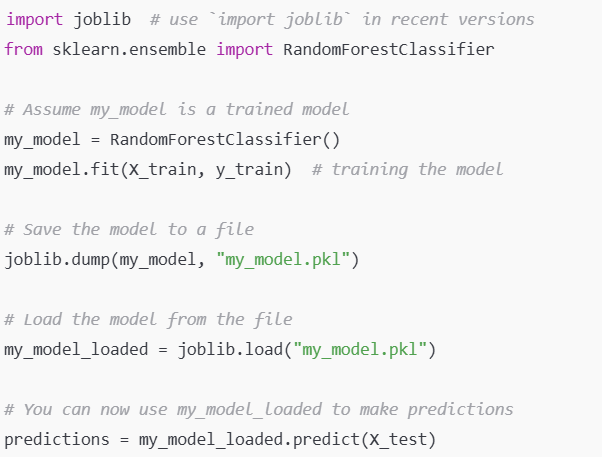

In [57]:
import joblib
joblib.dump(rand_forest,"rand_forest.pkl")
my_model_loaded=joblib.load("rand_forest.pkl")

The .pkl extension stands for "pickle," which is a common file extension used when saving Python objects in a serialized (binary) format. Python's pickle module, as well as joblib, use this format to save and load objects efficiently, especially when working with machine learning models, large data structures, or other complex objects.

Why Use .pkl with joblib?


While pickle is a general-purpose serialization library, joblib is specifically optimized for handling large objects like machine learning models and large NumPy arrays. The .pkl extension is commonly used by both pickle and joblib to indicate that the file contains a serialized Python object, but joblib typically performs faster when loading large arrays and models due to its specialized handling.

Alternative Extensions


Although .pkl is conventional, you can use other extensions like .joblib to specify files saved with joblib specifically, or any other extension, as long as it’s clear to users of the file that it holds serialized data. The extension itself does not affect the file’s contents, but .pkl and .joblib are widely understood in the Python community.

Example of Specifying a Different Extension





joblib.dump(my_model, "my_model.joblib")  # You can also use .joblib as the extension
my_model_loaded = joblib.load("my_model.joblib")




Important Note



While .pkl files are useful, they should be used with caution when sharing between systems, as they may contain code execution risks if untrusted files are loaded.

in the context of the RandomForestRegressor (or any other ensemble method like RandomForestClassifier) in Scikit-Learn, the bootstrap parameter controls whether bootstrap sampling is used when building the trees in the forest.

Meaning of bootstrap: False
When bootstrap=False, it means no bootstrapping is performed. Instead of randomly sampling with replacement to create different subsets of the training data for each tree, each tree is built using the entire training dataset.
Without bootstrapping, each tree will see the exact same data, which may lead to more similar trees and reduce the model's ability to generalize. Generally, bootstrap sampling (i.e., bootstrap=True) helps to create diverse trees that collectively improve the model’s accuracy and reduce overfitting.
Why Use bootstrap=False?
While bootstrapping helps to create a more robust model by introducing diversity among the trees, setting bootstrap=False can sometimes be useful for experimental purposes or when you want each tree to have maximum access to the full training data.
However, bootstrap=True (the default) is typically preferred because it allows each tree to train on different subsets of the data, which increases variance reduction across the ensemble.
Example Code
In your code snippet:

python
Copy code
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
The first dictionary includes hyperparameter combinations with bootstrap=True (the default), while the second dictionary includes bootstrap=False to experiment with non-bootstrapped trees.
This allows GridSearchCV to evaluate both bootstrapped and non-bootstrapped options to find the best combination of parameters.

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

para_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
     {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
      ]

forest_reg=RandomForestRegressor()

grid_search=GridSearchCV(forest_reg,para_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
x=grid_search.fit(transformed_full_features,label)



In [59]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [60]:
x

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

**x contains the fitted GridSearchCV object, which has information about the best parameters, the best estimator, and cross-validation results.**

In [61]:

transformed_full_features.shape

(16512, 17)

In [62]:
print(x)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')


In [63]:
grid_search

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [65]:
list(x.cv_results_)

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_max_features',
 'param_n_estimators',
 'param_bootstrap',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'split0_train_score',
 'split1_train_score',
 'split2_train_score',
 'split3_train_score',
 'split4_train_score',
 'mean_train_score',
 'std_train_score']

In [66]:
pd.DataFrame(x.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.078444,0.006820,0.005292,0.003139,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.305855e+09,-4.002946e+09,...,-4.138994e+09,1.579727e+08,18,-1.127799e+09,-1.117840e+09,-1.080172e+09,-1.086879e+09,-1.143682e+09,-1.111274e+09,2.420295e+07
1,0.254820,0.025577,0.012819,0.002422,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.153359e+09,-2.977552e+09,...,-3.110421e+09,1.260131e+08,11,-5.609354e+08,-5.678458e+08,-5.672555e+08,-6.035399e+08,-5.940619e+08,-5.787277e+08,1.683671e+07
2,0.753718,0.014398,0.029237,0.001736,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.846876e+09,-2.666850e+09,...,-2.830238e+09,9.212062e+07,7,-4.413829e+08,-4.553450e+08,-4.418269e+08,-4.354122e+08,-4.304910e+08,-4.408916e+08,8.345200e+06
3,0.120589,0.006200,0.003123,0.006246,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.687366e+09,-3.444619e+09,...,-3.614284e+09,1.442105e+08,16,-9.858748e+08,-9.562534e+08,-1.015213e+09,-8.758547e+08,-1.040169e+09,-9.746729e+08,5.685592e+07
4,0.400026,0.013773,0.012168,0.006120,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.901972e+09,-2.879047e+09,...,-2.902171e+09,1.895282e+07,9,-5.382369e+08,-5.517616e+08,-5.412440e+08,-5.351045e+08,-5.172366e+08,-5.367167e+08,1.123593e+07


In [67]:
x.best_params_

{'max_features': 8, 'n_estimators': 30}

In [68]:
x.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [69]:
cvres=x.cv_results_
for mean_score , params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score) , params)

64335.012897969376 {'max_features': 2, 'n_estimators': 3}
55771.150662621265 {'max_features': 2, 'n_estimators': 10}
53199.98233005283 {'max_features': 2, 'n_estimators': 30}
60118.91491618937 {'max_features': 4, 'n_estimators': 3}
53871.79875809802 {'max_features': 4, 'n_estimators': 10}
51373.83370594317 {'max_features': 4, 'n_estimators': 30}
59402.95028136839 {'max_features': 6, 'n_estimators': 3}
53038.10521732615 {'max_features': 6, 'n_estimators': 10}
51073.417021031135 {'max_features': 6, 'n_estimators': 30}
59004.41351704064 {'max_features': 8, 'n_estimators': 3}
53304.36949371113 {'max_features': 8, 'n_estimators': 10}
50670.598730425336 {'max_features': 8, 'n_estimators': 30}
62470.038864659546 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54473.63462984684 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59830.05792854727 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53168.61261053457 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [70]:
cvres

{'mean_fit_time': array([0.07844439, 0.2548203 , 0.75371833, 0.12058859, 0.40002637,
        1.19348626, 0.17156105, 0.55732851, 1.67976007, 0.2191524 ,
        0.7119885 , 2.1481297 , 0.1085876 , 0.36158504, 0.14752741,
        0.48933525, 0.18717732, 0.61093216]),
 'std_fit_time': array([0.00681978, 0.02557717, 0.01439835, 0.00619974, 0.01377336,
        0.0109415 , 0.00565114, 0.00932622, 0.01889845, 0.00683805,
        0.00569804, 0.02406914, 0.00527281, 0.00723333, 0.00473642,
        0.01278813, 0.00683248, 0.00526994]),
 'mean_score_time': array([0.0052917 , 0.01281943, 0.02923656, 0.00312309, 0.01216784,
        0.02955379, 0.00081182, 0.01229744, 0.03070011, 0.00335212,
        0.01585135, 0.03624706, 0.00908723, 0.01213684, 0.00311246,
        0.01126919, 0.00403833, 0.01292162]),
 'std_score_time': array([0.00313896, 0.00242202, 0.00173583, 0.00624619, 0.00611967,
        0.00359257, 0.00137717, 0.00393507, 0.00387938, 0.00670424,
        0.00166952, 0.00246144, 0.00416192, 

**after doing setting differnt hyperparameter we getting best rmse = 50670  and previously in default case rmse = 50193 so there is no advantage so for girdsearchcv need to take more estimator and max_parameter values...**

In [71]:
# Get the best model from GridSearchCV
best_model = x.best_estimator_

# Access the feature importances
feature_importances = best_model.feature_importances_

# Display the feature importances
feature_importances


array([6.46961725e-02, 5.80078649e-02, 4.42454726e-02, 1.54906095e-02,
       1.62808246e-02, 1.57136934e-02, 1.48994033e-02, 2.87599868e-01,
       1.57700483e-01, 3.83136859e-02, 1.11441354e-01, 3.15691975e-02,
       7.31973284e-03, 1.30066963e-01, 1.94886940e-04, 2.84384524e-03,
       3.61594318e-03])

In [72]:
len(feature_importances)

17

**cat_encoder = full_pipeline.named_transformers_["cat"]**

Explanation
full_pipeline: This is likely a ColumnTransformer object, which is a type of pipeline in Scikit-Learn designed for preprocessing data. The ColumnTransformer applies different transformations to different columns (e.g., scaling numerical columns and encoding categorical columns).

named_transformers_: This is an attribute of ColumnTransformer that stores all the transformers used within the pipeline. When you create a ColumnTransformer, you specify a name for each transformer, such as "cat" for categorical data and "num" for numerical data.

["cat"]: This accesses the transformer associated with the name "cat". In this case, "cat" refers to the transformer (likely a OneHotEncoder) applied to the categorical features in the dataset.

Purpose of named_transformers_
The purpose of named_transformers_ is to give you a convenient way to access individual transformers by the names you assigned to them when creating the ColumnTransformer. This is useful when you need to inspect or manipulate specific transformers or access attributes from them after fitting.

**cat_one_hot_attribs = list(cat_encoder.categories_[0])**

cat_encoder.categories_: This attribute of the OneHotEncoder stores the unique categories found in each categorical feature after the encoder has been fit on the data. Since cat_encoder represents the encoder for categorical data, cat_encoder.categories_ will be a list of arrays, where each array corresponds to the unique categories in each categorical column.

For example, if there was only one categorical column called "ocean_proximity" with values like "INLAND," "NEAR BAY," "ISLAND," etc., then cat_encoder.categories_ might look like this:


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]
cat_encoder.categories_[0]: Since categories_ is a list of arrays (one array per categorical column), categories_[0] accesses the array of categories for the first categorical column. In this example, cat_encoder.categories_[0] would be:


array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)
list(cat_encoder.categories_[0]): This converts the array of categories for the first categorical column into a Python list. This step makes it easier to work with the categories in subsequent steps (such as displaying feature importance alongside attribute names).

In [73]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [74]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_cat',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [75]:
sorted(zip(feature_importances,attributes),reverse=True)

[(0.28759986774659746, 'median_income'),
 (0.15770048275290163, 'income_cat'),
 (0.1300669629264811, 'INLAND'),
 (0.11144135417261687, 'pop_per_hhold'),
 (0.06469617252904836, 'longitude'),
 (0.05800786485763308, 'latitude'),
 (0.04424547258655475, 'housing_median_age'),
 (0.03831368588732523, 'rooms_per_hhold'),
 (0.03156919745460746, 'bedrooms_per_room'),
 (0.016280824619860433, 'total_bedrooms'),
 (0.01571369342592692, 'population'),
 (0.01549060951653963, 'total_rooms'),
 (0.014899403318039866, 'households'),
 (0.007319732840700653, '<1H OCEAN'),
 (0.0036159431837309423, 'NEAR OCEAN'),
 (0.002843845241272281, 'NEAR BAY'),
 (0.0001948869401631921, 'ISLAND')]

In [76]:
final_model=grid_search.best_estimator_

x_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set["median_house_value"].copy()


x_test_prepared=full_pipeline.transform(x_test)        # x_test_prepared is numpy array

final_predictin=final_model.predict(x_test_prepared)
final_mse=mean_squared_error(final_predictin,y_test)
final_rmse=np.sqrt(final_mse)
final_rmse


71735.06686998105

In [78]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictin - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([69696.57712356, 73717.20813311])